# Quantum Volume Demo

Show some basic functionality of the quantum volume experiment

In [1]:
import qiskit_experiments as qe
from qiskit import Aer

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Run QV experiment

/Users/dekelm/opt/anaconda3/lib/python3.7/site-packages/qiskit_experiments/quantum_volume/qv_analysis.py:208: UserWarning: Must use at least 100 trials to consider Quantum Volume as successful.
  warnings.warn("Must use at least 100 trials to consider Quantum Volume as successful.")


---------------------------------------------------
Experiment: QVExperiment
Experiment ID: 27f2286b-f6f3-444d-9eb1-27f7578e2ed1
Status: DONE
Circuits: 20
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- quantum volume: 1
- qv success: False
- confidence: 0.8865387333016174
- heavy output probability: [0.798828125 0.705078125 0.8583984375 0.79296875 0.74609375 0.6435546875
 0.693359375 0.744140625 0.7138671875 0.8173828125 0.986328125 0.666015625
 0.7763671875 0.966796875 0.6220703125 0.9755859375 0.8134765625
 0.70703125 0.8125 0.736328125]
- mean hop: 0.77880859375
- sigma: 0.09280780356498786
- depth: 3
- trials: 20
- success: True


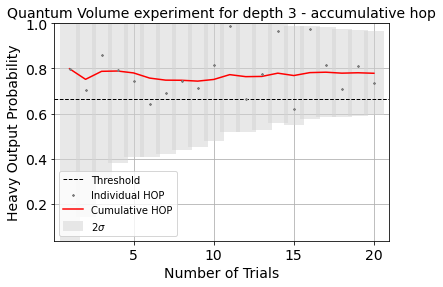

In [2]:
qubits = 3 # can use specific qubits. for example [2, 4, 7]
trials = 20

qv_exp = qe.quantum_volume.QVExperiment(qubits, trials)
expdata = qv_exp.run(backend)

# View result data
print(expdata)

### Adding trials

More trials will reduce the error bars to allow passing the threshold (beside the error bars - Quantum Volume experiment must have at least 100 trials to be consider successful)

---------------------------------------------------
Experiment: QVExperiment
Experiment ID: 27f2286b-f6f3-444d-9eb1-27f7578e2ed1
Status: DONE
Circuits: 100
Analysis Results: 2
---------------------------------------------------
Last Analysis Result
- quantum volume: 8
- qv success: True
- confidence: 0.997013988921829
- heavy output probability: [0.798828125 0.705078125 0.8583984375 0.79296875 0.74609375 0.6435546875
 0.693359375 0.744140625 0.7138671875 0.8173828125 0.986328125 0.666015625
 0.7763671875 0.966796875 0.6220703125 0.9755859375 0.8134765625
 0.70703125 0.8125 0.736328125 0.740234375 0.98046875 0.9873046875
 0.7412109375 0.986328125 0.6171875 0.8125 0.828125 0.7666015625
 0.9873046875 0.7412109375 0.8046875 0.8525390625 0.748046875 0.9912109375
 0.7880859375 0.8251953125 0.69140625 0.77734375 0.8359375 0.740234375
 0.7890625 0.7333984375 0.72265625 0.736328125 0.689453125 0.7451171875
 0.66015625 0.8359375 0.73046875 0.87109375 0.71875 0.7177734375 0.84375
 0.8466796875 0.

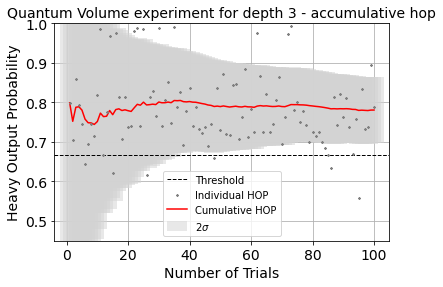

In [3]:
qv_exp.add_trials(80)
expdata2 = qv_exp.run(backend, experiment_data=expdata, simulation_data=qv_exp.simulation_data)
print(expdata2)

### Using another backed for simulation

---------------------------------------------------
Experiment: QVExperiment
Experiment ID: e282d7db-86a2-4975-9ddf-4961c657a302
Status: DONE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- quantum volume: 8
- qv success: True
- confidence: 0.997572694750277
- heavy output probability: [0.705078125 0.6953125 0.64453125 0.6787109375 0.763671875 0.794921875
 0.7939453125 0.787109375 0.7529296875 0.9892578125 0.7666015625
 0.8037109375 0.7275390625 0.8154296875 0.7548828125 0.9873046875
 0.982421875 0.658203125 0.8291015625 0.7470703125 0.787109375
 0.7841796875 0.7451171875 0.6767578125 0.7236328125 0.7509765625
 0.751953125 0.7080078125 0.8154296875 0.9912109375 0.7578125 0.9794921875
 0.845703125 0.9912109375 0.9892578125 0.759765625 0.833984375
 0.6513671875 0.69140625 0.8408203125 0.8115234375 0.8154296875
 0.748046875 0.9794921875 0.7392578125 0.697265625 0.7705078125 0.78515625
 0.6484375 0.740234375 0.794921875 0.7597656

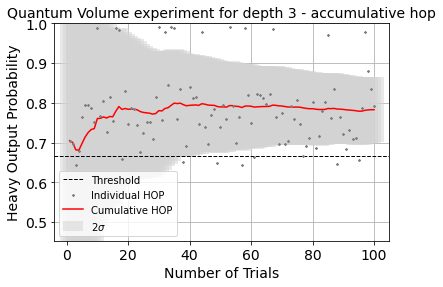

In [5]:
another_simulation_backend = Aer.get_backend('aer_simulator_matrix_product_state')
qv_exp2 = qe.quantum_volume.QVExperiment(qubits, trials=100, simulation_backend=another_simulation_backend)
expdata3 = qv_exp2.run(backend)
print(expdata3)